<a href="https://colab.research.google.com/github/andy3964600/streamlit/blob/main/LSTM_for_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use the artificial recurrent NN(LSTM) to prediction the stock closing price

Import the package

In [22]:
!pip install yfinance

In [1]:
import yfinance as yf
import math
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Get the Stock price for 2376.TW (From 2016/01/01 to 2021/11/10 , you can input your stock

In [2]:
stock_ID = '2376.TW'
tickerData = yf.Ticker(stock_ID)
tickerDF = tickerData.history(period='1d', start='2016-01-01', end='2021-11-10')
#Show the data
tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04,26.868111,26.868111,26.241556,26.315269,1210000,0.0,0
2016-01-05,26.020423,27.199820,26.020423,26.904970,1956000,0.0,0
2016-01-06,26.573263,26.610119,24.251329,24.435610,4322000,0.0,0
2016-01-07,24.435609,25.135873,24.361895,24.988451,3473000,0.0,0
2016-01-08,24.988452,25.393869,24.656746,24.951593,868000,0.0,0
...,...,...,...,...,...,...,...
2021-11-03,121.500000,124.000000,117.000000,123.000000,37616773,0.0,0
2021-11-04,125.000000,125.500000,121.000000,121.000000,19004012,0.0,0
2021-11-05,125.000000,129.500000,122.500000,124.000000,43765222,0.0,0


Plot the graph for close price and date

Text(0, 0.5, 'Closing price')

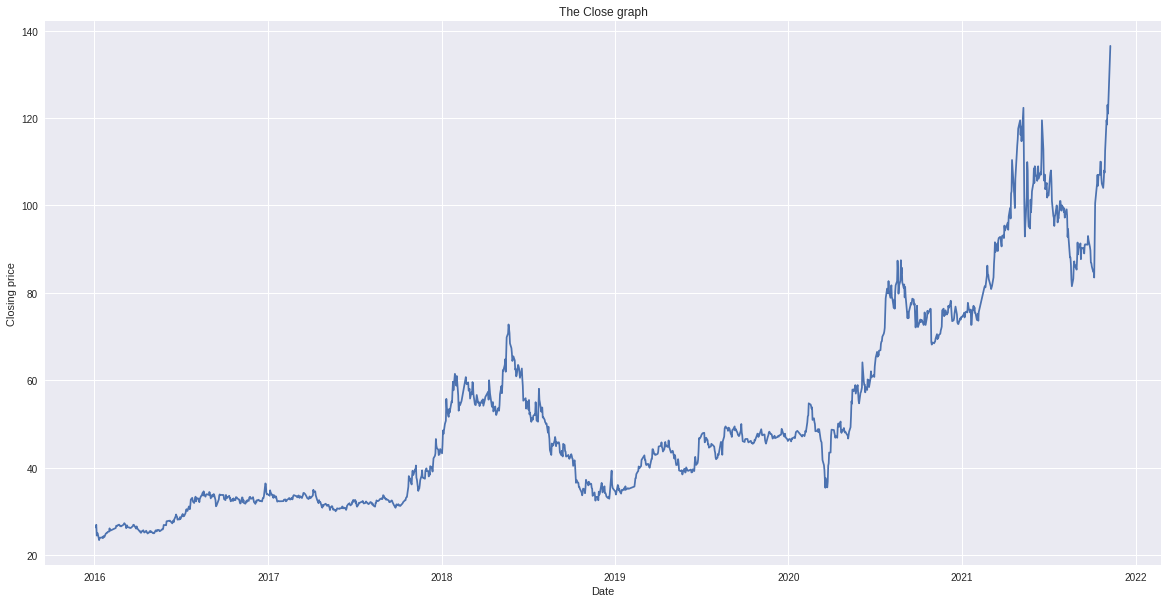

In [3]:
plt.figure(figsize=(20,10))
plt.title('The Close graph')
plt.plot(tickerDF['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')

DF for close price only

In [4]:
DF = tickerDF.filter(['Close'])
DFset = DF.values

Create the train/test dataset

In [6]:
train_set_len = math.ceil(len(DFset)* 0.75)
train_set_len

1068

In [5]:
Normalize_scalar = MinMaxScaler(feature_range=(0.0,1.0))
df1 = Normalize_scalar.fit_transform(np.array(DFset).reshape(-1, 1))
df1.shape

(1424, 1)

In [7]:
train_data, test_data = df1[0:train_set_len, :], df1[train_set_len:len(df1), :1]

print(train_data.shape)
print(len(train_data))
print(test_data.shape)
print(len(test_data))

(1068, 1)
1068
(356, 1)
356


Split the data into x_train ,y_train and x_test, y_test

In [16]:
x_train = []
y_train = []

for i in range(20, len(train_data)):
  x_train.append(train_data[i-20:i, 0])
  y_train.append(train_data[i, 0])
  

In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1048, 20, 1)
(1048,)


In [17]:
x_test = []
y_test = []

for i in range(20, len(test_data)):
  x_test.append(test_data[i-20:i,0])
  y_test.append(test_data[i, 0])

In [20]:
x_test, y_test = np.array(x_test),  np.array(y_test)


x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)

(336, 20, 1)
(336,)


Build the LSTM model

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 52,101
Trainable params: 52,101
Non-trainable params: 0
_________________________________________________________________


Train Model

In [29]:
model.fit(x_train, y_train, batch_size=64,epochs=80,verbose=1)

Epoch 1/80
17/17 [==============================] - 6s 42ms/step - loss: 0.0071
Epoch 2/80
17/17 [==============================] - 1s 48ms/step - loss: 0.0015
Epoch 3/80
17/17 [==============================] - 1s 46ms/step - loss: 8.3755e-04
Epoch 4/80
17/17 [==============================] - 1s 46ms/step - loss: 6.9503e-04
Epoch 5/80
17/17 [==============================] - 1s 46ms/step - loss: 6.4981e-04
Epoch 6/80
17/17 [==============================] - 1s 40ms/step - loss: 6.4060e-04
Epoch 7/80
17/17 [==============================] - 1s 40ms/step - loss: 6.0641e-04
Epoch 8/80
17/17 [==============================] - 1s 41ms/step - loss: 6.5758e-04
Epoch 9/80
17/17 [==============================] - 1s 44ms/step - loss: 6.0726e-04
Epoch 10/80
17/17 [==============================] - 1s 40ms/step - loss: 5.5272e-04
Epoch 11/80
17/17 [==============================] - 1s 40ms/step - loss: 5.4981e-04
Epoch 12/80
17/17 [==============================] - 1s 39ms/step - loss: 4.8480e-

Get the models prdicted price values

In [30]:
pred = model.predict(x_test)
pred = Normalize_scalar.inverse_transform(pred)

畫圖(plot)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


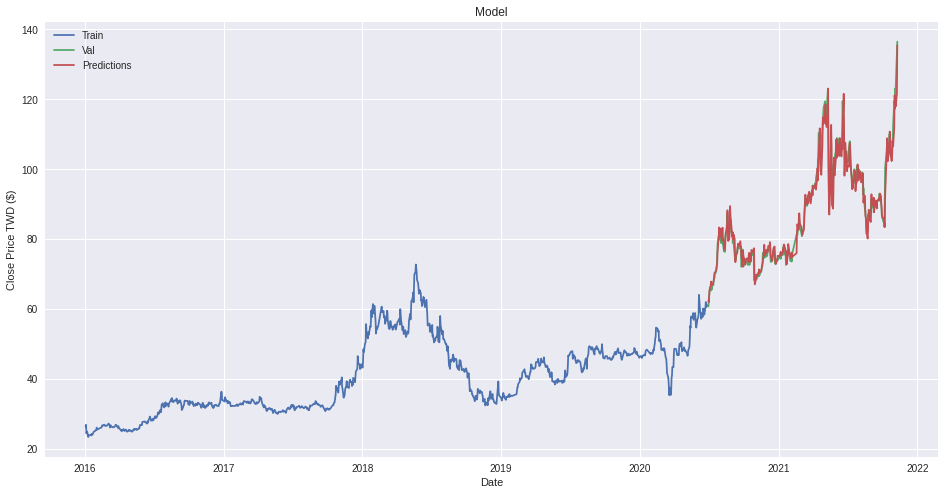

In [42]:
train = DF[ : train_set_len+20]
Val = DF[train_set_len+20: ]
Val['Predictions'] = pred

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price TWD ($)')
plt.plot(train['Close'])
plt.plot(Val[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper left')
plt.show()

In [44]:
Val

,Close,Predictions
Date,,
2020-06-30,60.733059,62.386276
2020-07-01,63.143837,61.930317
2020-07-02,64.256508,63.626289
2020-07-03,65.183731,65.592560
2020-07-06,66.481834,66.824516
...,...,...
2021-11-03,123.000000,117.383247
2021-11-04,121.000000,120.398598
2021-11-05,124.000000,117.999596


Get the quote

In [71]:
stock_ID = '2376.TW'
GIGAData = yf.Ticker(stock_ID)
GIGA_DAY = tickerData.history(period='1d', start='2021-11-10', end='2021-11-12')
print(GIGA_DAY['Close'])

Date
2021-11-10    139.0
2021-11-11    137.0
Name: Close, dtype: float64


In [70]:
stock_ID = '2376.TW'
GIGAData = yf.Ticker(stock_ID)
GIGA_DAY_2 = tickerData.history(period='1d', start='2019-01-10', end='2021-11-11')
#Create the new DF
new_df = GIGA_DAY_2.filter(['Close'])
#Get last 60 day's closing price
last_month = new_df[-60:].values
last_month_scaled = Normalize_scalar.transform(last_month)
x_test = []
x_test.append(last_month_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#prediciton
pred_price = model.predict(x_test)
pred_price = Normalize_scalar.inverse_transform(pred_price)
print('The prediction of Close price on next day= %s' % pred_price)

The prediction of Close price on next day= [[134.16689]]
